In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from sklearn.metrics import mean_squared_error

In [2]:
a, b, c, d, x_poczatkowe, y_poczatkowe = 1, 1, 1, 1, 4, 2 # parametry równania
x0 = np.array([x_poczatkowe, y_poczatkowe]) # warunki początkowe

In [3]:
def pochodna_ofiar(X0, t, a, b, c, d):
    poch_x = [(a - b*X0[1])*X0[0]]
    return poch_x

def pochodna_drapieznikow(X0, t, a, b, c, d):
    poch_y = [(c*X0[0] - d)*X0[1]]
    return poch_y

In [4]:
def rownanie_LV(X0, t, a, b, c, d):
    x_pochodne = pochodna_ofiar(X0, t, a, b, c, d)
    y_pochodne = pochodna_drapieznikow(X0, t, a, b, c, d)
    rhs = np.array([x_pochodne, y_pochodne])
    return rhs.ravel()

Nt = 1000 # liczba punktów, w których liczymy liczebność populacji
tmax = 60 # do jakiego czasu liczymy 
t = np.linspace(0,tmax, Nt)

In [5]:
rozw = integrate.odeint(rownanie_LV, x0, t, args = (a, b, c, d)) # rozwiązanie metodą całkowania równania rózniczkowe zwyczajnego
x, y = rozw.T

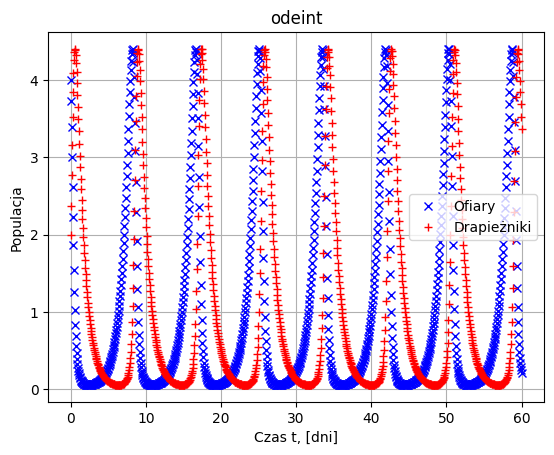

In [6]:
plt.figure()
plt.grid()
plt.title("odeint")
plt.plot(t, x, 'xb', label = 'Ofiary')
plt.plot(t, y, '+r', label = "Drapieżniki")
plt.xlabel('Czas t, [dni]')
plt.ylabel('Populacja')
plt.legend()

plt.show()

In [7]:
mu, sigma = 0, 0.1 
s = np.random.normal(mu, sigma, 4)
a0, b0, c0, d0 = a + s[0], b + s[1], c + s[2], d + s[3] # zmiana parametrów modelu

In [8]:
rozw_pred = integrate.odeint(rownanie_LV, x0, t, args = (a0, b0, c0, d0))
x_pred, y_pred = rozw_pred.T
print(f"Błąd średniokwadratowy ofiar to {mean_squared_error(x, x_pred)}\nBłąd średniokwadratowy drapieżników to {mean_squared_error(y, y_pred)}")

Błąd średniokwadratowy ofiar to 3.46443304226938
Błąd średniokwadratowy drapieżników to 3.1776509614825463


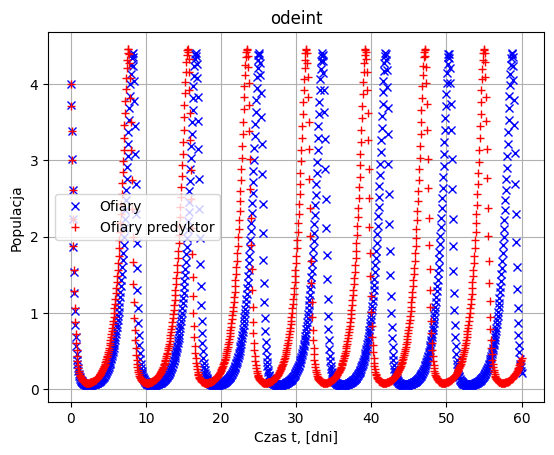

In [14]:
plt.figure()
plt.grid()
plt.title("odeint predyktor")
plt.plot(t, x, 'xb', label = 'Ofiary')
plt.plot(t, x_pred, '+r', label = "Ofiary predyktor")
plt.xlabel('Czas t, [dni]')
plt.ylabel('Populacja')
plt.legend()

plt.show()

In [9]:
# rozwiązanie używając solve_ivp
zwierzeta = integrate.solve_ivp(lambda t, x0: rownanie_LV(x0, t, a, b, c, d),
        (0, 60),
        x0,
        method='RK45',
        t_eval = t,
        dense_output=True
        )

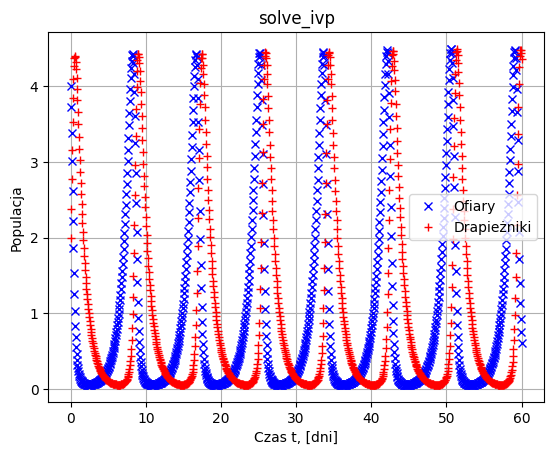

In [10]:
x2, y2 = zwierzeta.y
t2 = zwierzeta.t
plt.figure()
plt.grid()
plt.title("solve_ivp")
plt.plot(t2, x2, 'xb', label = 'Ofiary')
plt.plot(t2, y2, '+r', label = "Drapieżniki")
plt.xlabel('Czas t, [dni]')
plt.ylabel('Populacja')
plt.legend()

plt.show()

In [11]:
zwierzeta2 = integrate.solve_ivp(lambda t, x0: rownanie_LV(x0, t, a0, b0, c0, d0),
        (0, 60),
        x0,
        method='RK45',
        t_eval = t,
        dense_output=True
        )

In [12]:
x2_pred, y2_pred = zwierzeta2.y
t2_pred = zwierzeta2.t
print(f"odeint\nBłąd średniokwadratowy ofiar to {mean_squared_error(x2, x2_pred)}\nBłąd średniokwadratowy drapieżników to {mean_squared_error(y2, y2_pred)}")

odeint
Błąd średniokwadratowy ofiar to 3.5626814653689554
Błąd średniokwadratowy drapieżników to 3.1745525994962023


In [13]:
print(f"solve_ivp\nBłąd średniokwadratowy ofiar to {mean_squared_error(x, x_pred)}\nBłąd średniokwadratowy drapieżników to {mean_squared_error(y, y_pred)}")

solve_ivp
Błąd średniokwadratowy ofiar to 3.46443304226938
Błąd średniokwadratowy drapieżników to 3.1776509614825463


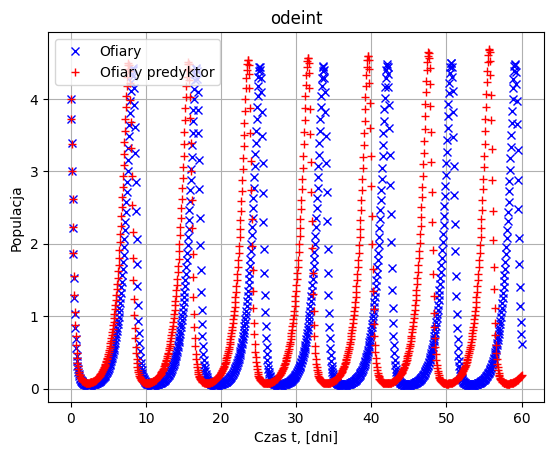

In [15]:
plt.figure()
plt.grid()
plt.title("solve_ivp predyktor")
plt.plot(t, x2, 'xb', label = 'Ofiary')
plt.plot(t, x2_pred, '+r', label = "Ofiary predyktor")
plt.xlabel('Czas t, [dni]')
plt.ylabel('Populacja')
plt.legend()

plt.show()